In [1]:
import pandas as pd
import numpy as np
from prep import draw_tree

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
df = pd.read_csv('../data/housing.csv')

In [ ]:
df.head()

In [4]:
def average_accuracy(df):
    prediction = df['PRICE'].mean()
    avg_accuracy = np.mean(np.abs(df['PRICE'] - prediction))
    return avg_accuracy

In [5]:
np.mean(np.abs(df['PRICE'] - df['PRICE'].mean()))

6.64720742395601

In [6]:
average_accuracy(df)

6.64720742395601

In [7]:
df['CHAS'].unique()

array([0, 1], dtype=int64)

In [8]:
left_split = df[df.LSTAT < 9.14].copy()
right_split = df[df.LSTAT >= 9.14].copy()

In [9]:
total_size = df.shape[0]
left_size  = left_split.shape[0]
right_size = right_split.shape[0]

In [10]:
left_size

187

In [11]:
average_accuracy(left_split)

7.314644399325124

In [12]:
average_accuracy(right_split)

4.198775562347068

In [13]:
average_accuracy(df) - (left_size/total_size)*average_accuracy(left_split) - (right_size/total_size)*average_accuracy(right_split)

1.2969151175083562

In [14]:
from sklearn.tree import DecisionTreeRegressor

# you must initialize your algorithm
tree = DecisionTreeRegressor(max_depth=4)

In [15]:
# let's declare X and y variables
y = df['PRICE']
X = df.drop('PRICE', axis=1)

In [16]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [17]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [18]:
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

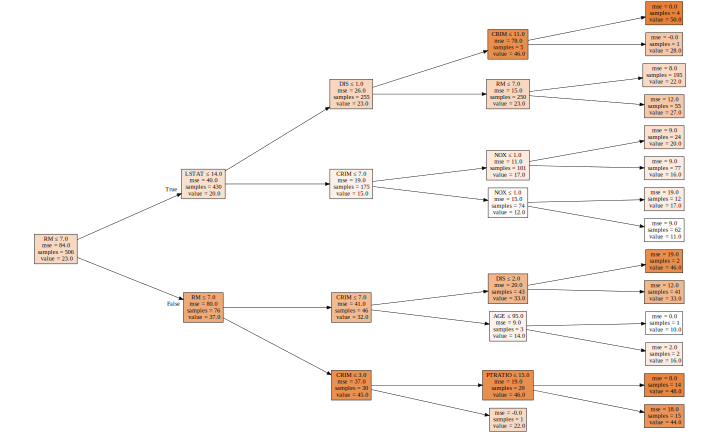

In [19]:
draw_tree(tree, X)

In [20]:
tree.predict(X)

array([27.42727273, 21.62974359, 32.74878049, 32.74878049, 32.74878049,
       21.62974359, 21.62974359, 20.02083333, 20.02083333, 20.02083333,
       20.02083333, 21.62974359, 20.02083333, 21.62974359, 21.62974359,
       21.62974359, 21.62974359, 16.23896104, 21.62974359, 21.62974359,
       16.23896104, 21.62974359, 16.23896104, 16.23896104, 16.23896104,
       16.23896104, 16.23896104, 16.23896104, 21.62974359, 27.42727273,
       16.23896104, 21.62974359, 16.23896104, 16.23896104, 16.23896104,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 27.42727273,
       32.74878049, 27.42727273, 21.62974359, 21.62974359, 21.62974359,
       21.62974359, 21.62974359, 20.02083333, 20.02083333, 20.02083333,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 20.02083333,
       32.74878049, 21.62974359, 27.42727273, 21.62974359, 21.62974359,
       21.62974359, 20.02083333, 21.62974359, 27.42727273, 32.74878049,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 21.62

In [21]:
tree.predict(X[:1])

array([27.42727273])

In [22]:
X[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [23]:
tree.score(X, y)

0.8857396443908376